# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [172]:
import pandas as pd


#### Read 'gold_price_usd.csv' & store it in a variable

In [173]:
df=pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [174]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [176]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [177]:
df.rename(columns={'USD (AM)': 'Price'}, inplace=True)
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [178]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Check if there are any missing values in the dataset

In [179]:
df.isna().sum()

Date     0
Price    0
Year     0
Month    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [180]:
df.describe()

,Price,Year,Month
count,4718.000000,4718.000000,4718.000000
mean,959.990812,2009.839339,6.456761
std,449.456217,5.392467,3.426217
min,256.700000,2001.000000,1.000000
25%,449.112500,2005.000000,3.000000
50%,1113.125000,2010.000000,6.000000
75%,1293.750000,2014.750000,9.000000
max,1896.500000,2019.000000,12.000000


#### Convert Date column from object to datetime format

In [181]:
df['Date'] = pd.to_datetime(df['Date'])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Month   4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

In [183]:
df['Year'] = df['Date'].dt.year

#### Create a new column with Months

In [184]:
df['Month'] = df['Date'].dt.month

In [185]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [186]:
#Years
unique_years = df['Year'].unique().tolist()
unique_years

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [187]:
#Months
unique_months = (df['Month'].unique().tolist())
unique_months


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

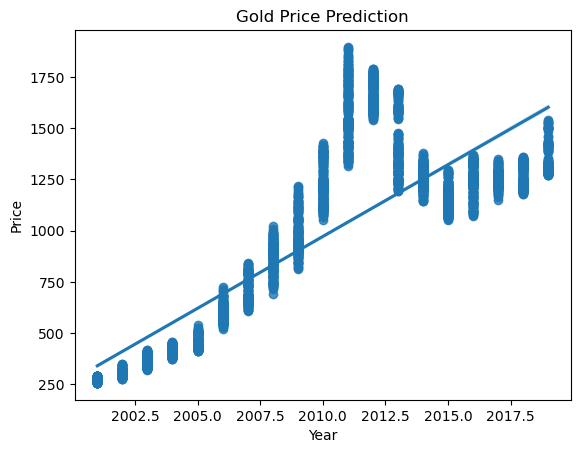

In [189]:
sns.regplot(data=df, x='Year', y='Price')
plt.title('Gold Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [190]:
#project outcome

### Plot a histplot to find the variation in price

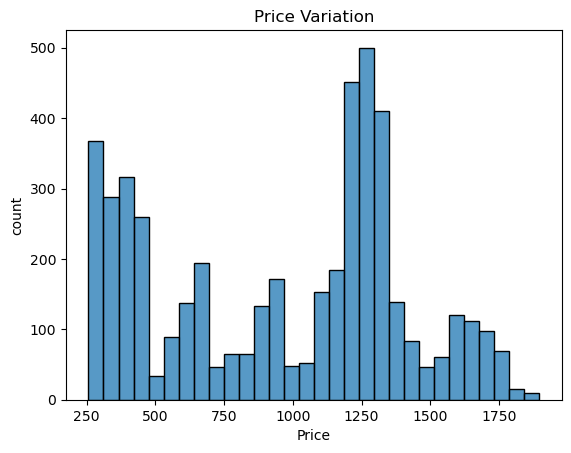

In [191]:
sns.histplot(data=df, x='Price', bins=30)
# Set plot title and labels
plt.title('Price Variation')
plt.xlabel('Price')
plt.ylabel('count')

# Display the plot
plt.show()

### Assign year and price in x and y variables

In [192]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [193]:
# import train_test split
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [195]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [196]:
model= LinearRegression()

### Train the  model

In [197]:
model.fit(X_train, y_train)

LinearRegression()

### Check the score of our model

In [198]:
model.score(X_train, y_train)

0.7048691960223041

### Check the coefficient and Intercept

In [199]:
#print the intercept
print(model.intercept_)

-140074.32374779374


In [200]:
#print the coefficent
print(model.coef_)


[70.17366927]


### Make Prediction with Test data

In [201]:
# Also store the predicted values in a variable
model.predict(X_test)

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [202]:
y_pred = model.predict(X_test)

In [203]:
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [204]:
y_test

962      425.50
403      307.80
3220    1335.75
1588     687.25
2065     924.75
         ...   
2237    1088.00
3262    1250.75
2817    1776.50
252      276.50
4441    1222.05
Name: Price, Length: 1416, dtype: float64

In [205]:
y_test=y_test.values
y_test

array([ 425.5 ,  307.8 , 1335.75, ..., 1776.5 ,  276.5 , 1222.05])

In [289]:
import numpy as np
X_test = np.ravel(X_test)

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [290]:
new_df=pd.DataFrame({'y_test':y_test,'prediction':y_pred},index=X_test)

new_df.index.name= 'year'


new_df

,y_test,prediction
year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [271]:
from sklearn.metrics import mean_absolute_error,r2_score

In [269]:
# Mean absolute error
mean_squared_error(y_test, y_pred)


58032.97376893121

In [272]:
# Mean squared error
r2_score(y_test, y_pred)

0.712548188045684

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [273]:


# Create a DataFrame with the years for prediction
years = [2025, 2026, 2027, 2028, 2030]
predict_df = pd.DataFrame({'Year': years})

# Make predictions using the trained model
predict_df['Price'] = model.predict(predict_df['Year'].values.reshape(-1, 1))

# Print the predicted prices
print(predict_df)


   Year        Price
0  2025  2027.356523
1  2026  2097.530192
2  2027  2167.703861
3  2028  2237.877530
4  2030  2378.224869


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***

# <span style = "color:green;font-size:40px"> Great Job!</span>